<a href="https://colab.research.google.com/github/NagumalliSowmika/The-Sparks-Foundation-Tasks/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task1-THE SPARKS FOUNDATION**

# Prediction Using Supervised Learning

# **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**NAME: Nagumalli Sowmika**

**TASK: Predict the percentage of the marks of students based on number of hours they studied.**

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Data Overview**

In [2]:
#reading data from csv file
scores_df=pd.read_csv('scores_data.csv')

In [3]:
scores_df.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
scores_df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data Preprocessing**

In [7]:
scores_df.isna().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values present in data

**Data Visualization**

In [8]:
scores_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


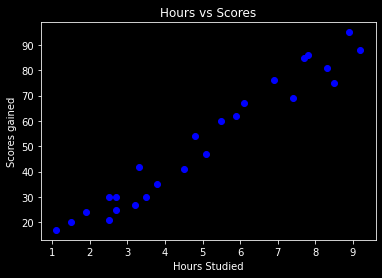

In [9]:
from matplotlib import style
style.use('dark_background')
plt.scatter(scores_df['Hours'],scores_df['Scores'], color='blue',marker='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores gained')  
plt.show()

The above graph shows that there is a linear relationship between hours studied and scores gained.

**Training the Algorithm**

Dividing the data into attributes and lables

In [10]:
X = scores_df.iloc[:, :-1].values  
y = scores_df.iloc[:, 1].values  

Splitting data into train and test sets for training

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

Training

In [12]:
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(X_train, y_train) 
print("Training complete.")

Training complete.


**Plotting Regression Line**

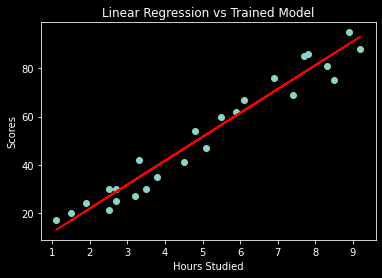

In [13]:
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
style.use('dark_background')
plt.title('Linear Regression vs Trained Model')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

**Making Predictions**

In [14]:
print(X_test) 
y_pred = regression.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


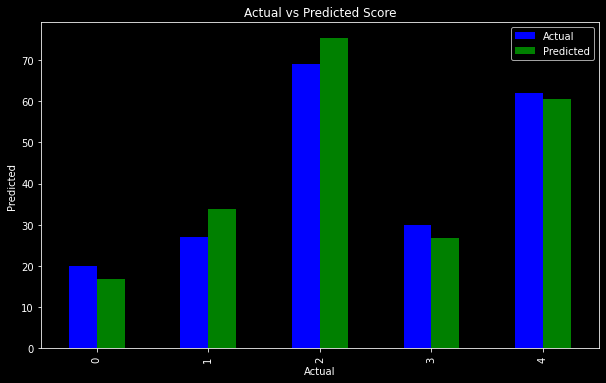

In [16]:
df.plot(kind='bar',figsize=(10,6),color=['blue','green'])
plt.title('Actual vs Predicted Score')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend(['Actual','Predicted'])
plt.show()

**Accuracy of the Model**

In [17]:
from sklearn import metrics
res=metrics.r2_score(y_test,y_pred)
print('Accuracy = ',res*100)

Accuracy =  94.54906892105353


**The Predicted Score if a student studies for 9.25 hours/day**

In [18]:
hours = 9.25
pred = regression.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539




**The percentage of marks scored by the student for 9.25 hours is 93.69 percentage.**

### Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.



In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
